# How does some of the music in one of my playlists compare to what's popular in the country based on danceability?

In [2]:
import requests
import base64
import six
import json
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tokens = pd.read_csv('Spotify_Keys.txt', sep = '\t', header = None).T
tokens.columns = tokens.iloc[0]
tokens = tokens[1:]
#tokens.Client_Secret[1]

In [4]:
def start_session_headers(client_id, client_secret):
    client_cred = base64.b64encode(six.text_type(client_id + ":" + client_secret).encode("ascii"))
    headers = {"Authorization": "Basic %s" % client_cred.decode("ascii")}
    return headers

#print(start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1]))

In [5]:
def connect_to_client_cred(url, headers):
    payload = {'grant_type' : 'client_credentials'}
    response = requests.request("POST", url, headers = headers, data = payload)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [6]:
def get_access_token():
    #Uses the Client Credentials flow, no access to endpoints with user data
    url = "https://accounts.spotify.com/api/token"
    header = start_session_headers(tokens.Client_ID[1], tokens.Client_Secret[1])
    json_response = connect_to_client_cred(url, header)

    #return json.dumps(json_response, indent = 4, sort_keys = True)
    return json_response

In [7]:
session_token = get_access_token()

200


In [8]:
#session_token

In [9]:
#session_token['access_token']

In [10]:
def create_header(session_token):
    headers = {"Authorization": "Bearer {}".format(session_token)}
    return headers

#create_header(session_token['access_token'])

In [11]:
def connect_to_endpoint(url, headers):
    response =requests.request("GET", url, headers = headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [12]:
def track_audio_features(id):
    url = 'https://api.spotify.com/v1/audio-features/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

In [13]:
def get_an_album(id):
    url = 'https://api.spotify.com/v1/albums/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

In [14]:
def get_a_playlist(id):
    url = '	https://api.spotify.com/v1/playlists/{}'.format(id)
    header = create_header(session_token['access_token'])
    json_response = connect_to_endpoint(url, header)
    return json_response

### GLASS ANIMALS - How To be A Human Being

In [15]:
album = get_an_album('6qb9MDR0lfsN9a2pw77uJy')

200


In [16]:
#album

In [17]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [18]:
album['tracks']['items'][0]['id']

'32zkKx35Et6A515oZKxDkD'

In [19]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200


In [20]:
#audio_features

In [21]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.699,0.670,1,-6.219,1,0.0347,0.0147,0.220000,0.356,0.556,111.988,audio_features,32zkKx35Et6A515oZKxDkD,spotify:track:32zkKx35Et6A515oZKxDkD,https://api.spotify.com/v1/tracks/32zkKx35Et6A...,https://api.spotify.com/v1/audio-analysis/32zk...,281407,4
1,0.648,0.718,9,-7.765,0,0.0298,0.1290,0.001560,0.112,0.785,96.017,audio_features,1LPGwuFgIzbJoShfDdw7MY,spotify:track:1LPGwuFgIzbJoShfDdw7MY,https://api.spotify.com/v1/tracks/1LPGwuFgIzbJ...,https://api.spotify.com/v1/audio-analysis/1LPG...,230693,4
2,0.742,0.289,5,-7.833,0,0.1150,0.5430,0.000046,0.228,0.710,147.986,audio_features,4vcoNCrTtunmJ9q8srpVly,spotify:track:4vcoNCrTtunmJ9q8srpVly,https://api.spotify.com/v1/tracks/4vcoNCrTtunm...,https://api.spotify.com/v1/audio-analysis/4vco...,243509,4
3,0.698,0.664,7,-7.828,1,0.0778,0.1210,0.001310,0.331,0.623,96.001,audio_features,5C5gvDZsl6d8bh89URfKHr,spotify:track:5C5gvDZsl6d8bh89URfKHr,https://api.spotify.com/v1/tracks/5C5gvDZsl6d8...,https://api.spotify.com/v1/audio-analysis/5C5g...,253831,4
4,0.460,0.314,6,-10.158,0,0.0267,0.6990,0.000004,0.122,0.216,90.014,audio_features,5o4znEHwozOHIgHoWAllnr,spotify:track:5o4znEHwozOHIgHoWAllnr,https://api.spotify.com/v1/tracks/5o4znEHwozOH...,https://api.spotify.com/v1/audio-analysis/5o4z...,266747,4


### JOJI - BALLADS1

In [22]:
album = get_an_album('34GQP3dILpyCN018y2k61L')

200


In [23]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [24]:
album['tracks']['items'][0]['id']

'5aqu5xhPqoOWqF71PkfgM8'

In [25]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200


In [26]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.787,0.312,7,-12.401,1,0.0383,0.895,0.02240,0.1150,0.425,119.899,audio_features,5aqu5xhPqoOWqF71PkfgM8,spotify:track:5aqu5xhPqoOWqF71PkfgM8,https://api.spotify.com/v1/tracks/5aqu5xhPqoOW...,https://api.spotify.com/v1/audio-analysis/5aqu...,128888,4
1,0.515,0.479,3,-7.458,1,0.0261,0.544,0.00598,0.1910,0.284,88.964,audio_features,0rKtyWc8bvkriBthvHKY8d,spotify:track:0rKtyWc8bvkriBthvHKY8d,https://api.spotify.com/v1/tracks/0rKtyWc8bvkr...,https://api.spotify.com/v1/audio-analysis/0rKt...,209274,4
2,0.646,0.648,3,-8.602,1,0.0372,0.710,0.00316,0.1080,0.466,75.004,audio_features,1DMEzmAoQIikcL52psptQL,spotify:track:1DMEzmAoQIikcL52psptQL,https://api.spotify.com/v1/tracks/1DMEzmAoQIik...,https://api.spotify.com/v1/audio-analysis/1DME...,179423,4
3,0.305,0.715,7,-7.540,1,0.0554,0.105,0.04950,0.0906,0.290,82.977,audio_features,0Y9D1Bc4fAkeZnVsGKdij6,spotify:track:0Y9D1Bc4fAkeZnVsGKdij6,https://api.spotify.com/v1/tracks/0Y9D1Bc4fAke...,https://api.spotify.com/v1/audio-analysis/0Y9D...,251015,4
4,0.900,0.316,9,-8.797,1,0.3320,0.684,0.07710,0.0853,0.844,129.914,audio_features,39oeKRgsLeynDIbWuXyA47,spotify:track:39oeKRgsLeynDIbWuXyA47,https://api.spotify.com/v1/tracks/39oeKRgsLeyn...,https://api.spotify.com/v1/audio-analysis/39oe...,107077,4


### BILLIE EILISH - WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?

In [27]:
album = get_an_album('0S0KGZnfBGSIssfF54WSJh')

200


In [28]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [29]:
album['tracks']['items'][0]['id']

'0rQtoQXQfwpDW0c7Fw1NeM'

In [30]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [31]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.000,0.278,1,-21.630,1,0.000,0.768,0.00000,0.669,0.0000,0.000,audio_features,0rQtoQXQfwpDW0c7Fw1NeM,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,https://api.spotify.com/v1/tracks/0rQtoQXQfwpD...,https://api.spotify.com/v1/audio-analysis/0rQt...,13578,0
1,0.701,0.425,7,-10.965,1,0.375,0.328,0.13000,0.100,0.5620,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
2,0.521,0.125,9,-17.832,1,0.239,0.751,0.00207,0.265,0.0528,111.554,audio_features,4QIo4oxwzzafcBWkKjDpXY,spotify:track:4QIo4oxwzzafcBWkKjDpXY,https://api.spotify.com/v1/tracks/4QIo4oxwzzaf...,https://api.spotify.com/v1/audio-analysis/4QIo...,243725,4
3,0.678,0.533,4,-10.485,1,0.186,0.462,0.21900,0.139,0.3230,150.455,audio_features,3XF5xLJHOQQRbWya6hBp7d,spotify:track:3XF5xLJHOQQRbWya6hBp7d,https://api.spotify.com/v1/tracks/3XF5xLJHOQQR...,https://api.spotify.com/v1/audio-analysis/3XF5...,180953,4
4,0.726,0.444,8,-8.922,0,0.372,0.283,0.14300,0.177,0.5690,185.044,audio_features,6IRdLKIyS4p7XNiP8r6rsx,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,https://api.spotify.com/v1/tracks/6IRdLKIyS4p7...,https://api.spotify.com/v1/audio-analysis/6IRd...,168840,4


### KID CUDI - Man On The Moon: The End Of Day

In [32]:
album = get_an_album('47y3PbX8oIDCkYAFylCJz0')

200


In [33]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [34]:
album['tracks']['items'][0]['id']

'3Xm9jQDd8my7ui5DUtEHYf'

In [35]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [36]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.650,0.417,2,-12.413,0,0.0574,0.286,0.000033,0.1040,0.475,98.415,audio_features,3Xm9jQDd8my7ui5DUtEHYf,spotify:track:3Xm9jQDd8my7ui5DUtEHYf,https://api.spotify.com/v1/tracks/3Xm9jQDd8my7...,https://api.spotify.com/v1/audio-analysis/3Xm9...,199000,4
1,0.464,0.754,9,-6.653,0,0.1280,0.465,0.000016,0.3700,0.444,86.501,audio_features,1cdC9TCqyLwAlsw3fVJaJS,spotify:track:1cdC9TCqyLwAlsw3fVJaJS,https://api.spotify.com/v1/tracks/1cdC9TCqyLwA...,https://api.spotify.com/v1/audio-analysis/1cdC...,235627,4
2,0.802,0.742,1,-4.607,1,0.1110,0.265,0.000287,0.6300,0.512,95.000,audio_features,77fcAXl6MsFPtFJG45zTUE,spotify:track:77fcAXl6MsFPtFJG45zTUE,https://api.spotify.com/v1/tracks/77fcAXl6MsFP...,https://api.spotify.com/v1/audio-analysis/77fc...,151333,4
3,0.768,0.449,7,-7.569,0,0.0290,0.518,0.000463,0.1360,0.614,79.120,audio_features,2EHEQx2avP1fNBLJf5UGYy,spotify:track:2EHEQx2avP1fNBLJf5UGYy,https://api.spotify.com/v1/tracks/2EHEQx2avP1f...,https://api.spotify.com/v1/audio-analysis/2EHE...,266307,4
4,0.723,0.452,11,-9.420,0,0.0328,0.308,0.006400,0.0923,0.375,125.015,audio_features,246SdvVYT3yrZPXU7NSWwy,spotify:track:246SdvVYT3yrZPXU7NSWwy,https://api.spotify.com/v1/tracks/246SdvVYT3yr...,https://api.spotify.com/v1/audio-analysis/246S...,261360,4


### KID CUDI - Passion, Pain & Demon Slayin'

In [37]:
album = get_an_album('5bCk3kWAy2JbbTfHqzZCII')

200


In [38]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [39]:
album['tracks']['items'][0]['id']

'0O6jl8Zamz6TGF0nUwMQsF'

In [40]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [41]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.791,0.577,1,-6.555,1,0.0367,0.4980,0.470000,0.120,0.217,115.070,audio_features,0O6jl8Zamz6TGF0nUwMQsF,spotify:track:0O6jl8Zamz6TGF0nUwMQsF,https://api.spotify.com/v1/tracks/0O6jl8Zamz6T...,https://api.spotify.com/v1/audio-analysis/0O6j...,298240,4
1,0.357,0.377,2,-10.723,1,0.0428,0.6100,0.371000,0.110,0.116,165.208,audio_features,5cjsgbZ8tZYD4f0LNpApnf,spotify:track:5cjsgbZ8tZYD4f0LNpApnf,https://api.spotify.com/v1/tracks/5cjsgbZ8tZYD...,https://api.spotify.com/v1/audio-analysis/5cjs...,269227,3
2,0.595,0.442,7,-11.115,0,0.0289,0.1160,0.770000,0.114,0.134,81.992,audio_features,5Tm9At0xeFb0MtlV8uI3eY,spotify:track:5Tm9At0xeFb0MtlV8uI3eY,https://api.spotify.com/v1/tracks/5Tm9At0xeFb0...,https://api.spotify.com/v1/audio-analysis/5Tm9...,327973,4
3,0.756,0.850,9,-5.885,0,0.0538,0.0559,0.000809,0.111,0.415,100.005,audio_features,5FxVTEpoBress37MmlMhbZ,spotify:track:5FxVTEpoBress37MmlMhbZ,https://api.spotify.com/v1/tracks/5FxVTEpoBres...,https://api.spotify.com/v1/audio-analysis/5FxV...,257053,4
4,0.661,0.596,9,-8.176,0,0.0801,0.0391,0.331000,0.943,0.538,154.017,audio_features,4HMhDkyOObFngSAz2xeQhK,spotify:track:4HMhDkyOObFngSAz2xeQhK,https://api.spotify.com/v1/tracks/4HMhDkyOObFn...,https://api.spotify.com/v1/audio-analysis/4HMh...,250587,4


### TAME IMPALA - Currents

In [42]:
album = get_an_album('79dL7FLiJFOO0EoehUHQBv')

200


In [43]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [44]:
album['tracks']['items'][0]['id']

'2X485T9Z5Ly0xyaghN73ed'

In [45]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [46]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.602,0.881,1,-5.875,0,0.0443,0.004620,0.026600,0.1110,0.577,125.012,audio_features,2X485T9Z5Ly0xyaghN73ed,spotify:track:2X485T9Z5Ly0xyaghN73ed,https://api.spotify.com/v1/tracks/2X485T9Z5Ly0...,https://api.spotify.com/v1/audio-analysis/2X48...,467587,4
1,0.536,0.526,0,-9.754,1,0.1810,0.159000,0.847000,0.1280,0.434,167.608,audio_features,1cCbsojaA6GIT7Y3zuMJ1q,spotify:track:1cCbsojaA6GIT7Y3zuMJ1q,https://api.spotify.com/v1/tracks/1cCbsojaA6GI...,https://api.spotify.com/v1/audio-analysis/1cCb...,107533,4
2,0.547,0.827,7,-6.036,1,0.0468,0.000296,0.101000,0.0858,0.451,119.089,audio_features,1UYj8qTWjneZJDVjUMwMub,spotify:track:1UYj8qTWjneZJDVjUMwMub,https://api.spotify.com/v1/tracks/1UYj8qTWjneZ...,https://api.spotify.com/v1/audio-analysis/1UYj...,255413,4
3,0.373,0.609,0,-7.000,1,0.0316,0.108000,0.000427,0.0755,0.354,179.955,audio_features,0xtIp0lgccN85GfGOekS5L,spotify:track:0xtIp0lgccN85GfGOekS5L,https://api.spotify.com/v1/tracks/0xtIp0lgccN8...,https://api.spotify.com/v1/audio-analysis/0xtI...,270680,4
4,0.424,0.615,9,-6.217,0,0.0325,0.015800,0.000389,0.0844,0.155,77.935,audio_features,5M4yti0QxgqJieUYaEXcpw,spotify:track:5M4yti0QxgqJieUYaEXcpw,https://api.spotify.com/v1/tracks/5M4yti0QxgqJ...,https://api.spotify.com/v1/audio-analysis/5M4y...,318591,4


### MAC MILLER - Swimming

In [47]:
album = get_an_album('5wtE5aLX5r7jOosmPhJhhk')

200


In [48]:
album.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [49]:
album['tracks']['items'][0]['id']

'01z2fBGB8Hl3Jd3zXe4IXR'

In [50]:
audio_features = [track_audio_features(x['id']) for x in album['tracks']['items']]

200
200
200
200
200
200
200
200
200
200
200
200
200


In [51]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.272,0.238,2,-12.148,0,0.0349,0.890,0.00925,0.275,0.119,83.507,audio_features,01z2fBGB8Hl3Jd3zXe4IXR,spotify:track:01z2fBGB8Hl3Jd3zXe4IXR,https://api.spotify.com/v1/tracks/01z2fBGB8Hl3...,https://api.spotify.com/v1/audio-analysis/01z2...,161840,4
1,0.690,0.462,8,-8.054,1,0.1300,0.343,0.00218,0.113,0.325,157.655,audio_features,5p7GiBZNL1afJJDUrOA6C8,spotify:track:5p7GiBZNL1afJJDUrOA6C8,https://api.spotify.com/v1/tracks/5p7GiBZNL1af...,https://api.spotify.com/v1/audio-analysis/5p7G...,245640,4
2,0.759,0.492,1,-10.338,0,0.1200,0.736,0.00989,0.107,0.561,104.974,audio_features,2dgrYdgguVZKeCsrVb9XEs,spotify:track:2dgrYdgguVZKeCsrVb9XEs,https://api.spotify.com/v1/tracks/2dgrYdgguVZK...,https://api.spotify.com/v1/audio-analysis/2dgr...,288640,4
3,0.599,0.317,1,-11.212,1,0.1740,0.748,0.00000,0.111,0.203,148.090,audio_features,0Xcy81PsJCOO6mhLZaQyQ4,spotify:track:0Xcy81PsJCOO6mhLZaQyQ4,https://api.spotify.com/v1/tracks/0Xcy81PsJCOO...,https://api.spotify.com/v1/audio-analysis/0Xcy...,215413,4
4,0.520,0.538,1,-8.109,1,0.2060,0.367,0.00187,0.119,0.177,141.894,audio_features,5bJ1DrEM4hNCafcDd1oxHx,spotify:track:5bJ1DrEM4hNCafcDd1oxHx,https://api.spotify.com/v1/tracks/5bJ1DrEM4hNC...,https://api.spotify.com/v1/audio-analysis/5bJ1...,345133,4


### This graphs shows the danceability of all the albums on a scale from 0 to 1.

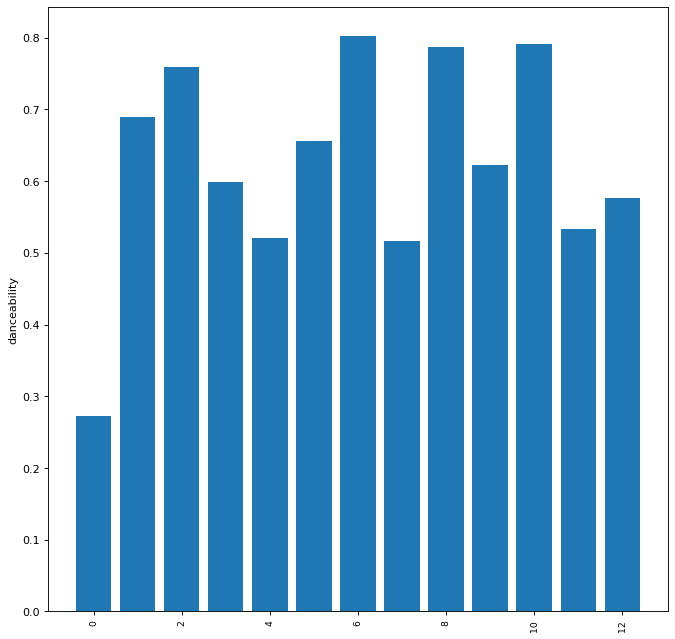

In [52]:
labels = audio_features_df['danceability'].keys()
vals = audio_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### PLAYLIST - TOP 50 USA

In [53]:
playlist = get_a_playlist('37i9dQZEVXbLRQDuF5jeBp')

200


In [54]:
playlist.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [55]:
playlist['tracks']['items'][0]

{'added_at': '2021-05-03T11:09:21Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6AgTAQt8XS6jRWi4sX7w49'},
     'href': 'https://api.spotify.com/v1/artists/6AgTAQt8XS6jRWi4sX7w49',
     'id': '6AgTAQt8XS6jRWi4sX7w49',
     'name': 'Polo G',
     'type': 'artist',
     'uri': 'spotify:artist:6AgTAQt8XS6jRWi4sX7w49'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    '

In [56]:
audio_features_df = pd.DataFrame(audio_features)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.272,0.238,2,-12.148,0,0.0349,0.890,0.00925,0.275,0.119,83.507,audio_features,01z2fBGB8Hl3Jd3zXe4IXR,spotify:track:01z2fBGB8Hl3Jd3zXe4IXR,https://api.spotify.com/v1/tracks/01z2fBGB8Hl3...,https://api.spotify.com/v1/audio-analysis/01z2...,161840,4
1,0.690,0.462,8,-8.054,1,0.1300,0.343,0.00218,0.113,0.325,157.655,audio_features,5p7GiBZNL1afJJDUrOA6C8,spotify:track:5p7GiBZNL1afJJDUrOA6C8,https://api.spotify.com/v1/tracks/5p7GiBZNL1af...,https://api.spotify.com/v1/audio-analysis/5p7G...,245640,4
2,0.759,0.492,1,-10.338,0,0.1200,0.736,0.00989,0.107,0.561,104.974,audio_features,2dgrYdgguVZKeCsrVb9XEs,spotify:track:2dgrYdgguVZKeCsrVb9XEs,https://api.spotify.com/v1/tracks/2dgrYdgguVZK...,https://api.spotify.com/v1/audio-analysis/2dgr...,288640,4
3,0.599,0.317,1,-11.212,1,0.1740,0.748,0.00000,0.111,0.203,148.090,audio_features,0Xcy81PsJCOO6mhLZaQyQ4,spotify:track:0Xcy81PsJCOO6mhLZaQyQ4,https://api.spotify.com/v1/tracks/0Xcy81PsJCOO...,https://api.spotify.com/v1/audio-analysis/0Xcy...,215413,4
4,0.520,0.538,1,-8.109,1,0.2060,0.367,0.00187,0.119,0.177,141.894,audio_features,5bJ1DrEM4hNCafcDd1oxHx,spotify:track:5bJ1DrEM4hNCafcDd1oxHx,https://api.spotify.com/v1/tracks/5bJ1DrEM4hNC...,https://api.spotify.com/v1/audio-analysis/5bJ1...,345133,4


# Danceability put in a scatter plot. This should be the one of the playlist.

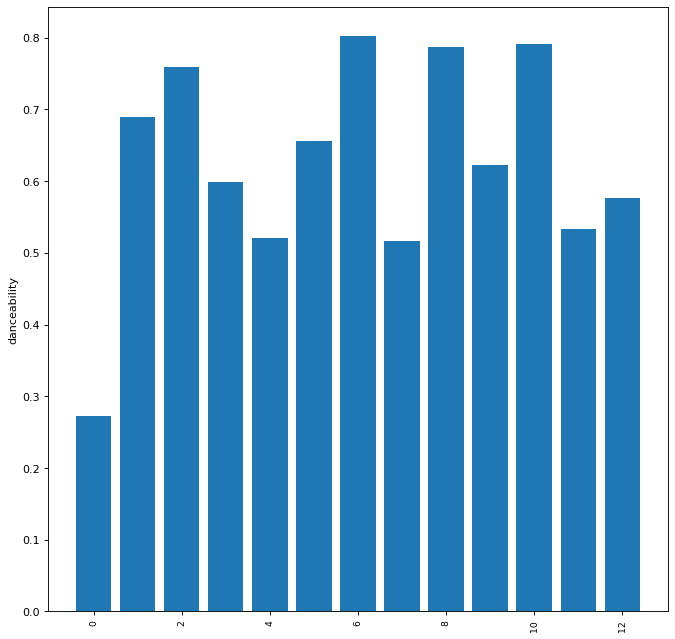

In [57]:
labels = audio_features_df['danceability'].keys()
vals = audio_features_df['danceability']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('danceability')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

# Next I am trying to compare both plots and see how the data matches danceability wise if at all.